# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import requests
import json
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress, pearsonr
%matplotlib inline
import matplotlib
from api_keys import weather_api_key

## Generate Cities List

In [2]:
#Generate 1500 random latitude (-90 to 90) and longitude (-180 to 180) coordinates.

latitudes =[]
longitudes = []
for _ in range(1500): 
    latitude = random.randrange(-90, 90)
    longitude = random.randrange(-180, 180)
    latitudes.append(latitude)
    longitudes.append(longitude)             
    

In [3]:
from citipy import citipy

cities = []
countries = []
for latitude, longitude in zip(latitudes, longitudes):
    location = citipy.nearest_city(latitude, longitude)
    city = location.city_name
    country = location.country_code
    cities.append(city)
    countries.append(country)

#Get rid of redundant cities in city list.
final_cities = []
for city in cities: 
    if city not in final_cities: 
        final_cities.append(city)

  

len(final_cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
weather_url = "http://api.openweathermap.org/data/2.5/weather?"

api_cities =[]
city_ids = []
countries = []
api_latitudes = []
api_longitudes = []
max_temps = []
humidities = []
clouds = []
wind_speeds = []
dates = []

for city in final_cities:
    query_url= f"{weather_url}q={city}&units=imperial&appid={weather_api_key}"
    city_weather = requests.get(query_url).json()
    try:
        city_name = city_weather["name"]
        city_id = city_weather["id"]
        print(f"Processing City = {city_name}, ID={city_id}...")
        api_cities.append(city_name)
        city_ids.append(city_id)
        countries.append(city_weather ["sys"]["country"])
        api_latitudes.append(city_weather["coord"]["lat"])
        api_longitudes.append(city_weather["coord"]["lon"])
        max_temps.append(city_weather["main"]["temp_max"])
        humidities.append(city_weather["main"]["humidity"])
        clouds.append(city_weather["clouds"]["all"])
        wind_speeds.append(city_weather["wind"]["speed"])
        dates.append(city_weather["dt"])
    except:
        print("City not found. Skipping...")
        pass

print("Complete ALL Searches!")

Processing City = Ushuaia, ID=3833367...
Processing City = Port Alfred, ID=964432...
Processing City = Busselton, ID=2075265...
City not found. Skipping...
Processing City = Beloha, ID=1067565...
Processing City = Tura, ID=1254046...
Processing City = Hermanus, ID=3366880...
Processing City = Guararé, ID=3708911...
City not found. Skipping...
Processing City = Qaanaaq, ID=3831208...
Processing City = Puerto Ayora, ID=3652764...
Processing City = Cherskiy, ID=2126199...
Processing City = Westport, ID=4845585...
Processing City = Dwārka, ID=1272140...
City not found. Skipping...
Processing City = Tuktoyaktuk, ID=6170031...
Processing City = Mataura, ID=6201424...
Processing City = Jamestown, ID=5122534...
Processing City = Port Lincoln, ID=2063036...
Processing City = George Town, ID=1735106...
Processing City = Tasiilaq, ID=3424607...
Processing City = Butaritari, ID=2110227...
Processing City = Saskylakh, ID=2017155...
Processing City = Thompson, ID=6165406...
Processing City = Aloleng

Processing City = Xai-Xai, ID=1024552...
Processing City = Saint-Pierre, ID=935214...
Processing City = Saint George, ID=5546220...
Processing City = Dolores, ID=3435038...
Processing City = Nara, ID=1855612...
Processing City = Raja, ID=368246...
Processing City = Egvekinot, ID=4031742...
Processing City = Colares, ID=2269142...
Processing City = Sechura, ID=3691954...
Processing City = Menzelinsk, ID=527529...
Processing City = Yulara, ID=6355222...
Processing City = Srednekolymsk, ID=2121025...
Processing City = Weleri, ID=1621655...
City not found. Skipping...
City not found. Skipping...
Processing City = Touros, ID=3386213...
Processing City = Zhigansk, ID=2012530...
Processing City = Laguna, ID=5364271...
Processing City = Winnemucca, ID=5710360...
City not found. Skipping...
Processing City = Akureyri, ID=2633274...
Processing City = Beringovskiy, ID=2126710...
Processing City = Aktash, ID=1511997...
City not found. Skipping...
Processing City = Mezen', ID=527321...
City not fou

Processing City = Wanganui, ID=2179670...
Processing City = Vestmanna, ID=2610343...
Processing City = Andenes, ID=3163146...
Processing City = Kokopo, ID=2093685...
Processing City = Te Anau, ID=2181625...
Processing City = Mbengwi, ID=2227853...
Processing City = Ushtobe, ID=1517637...
Processing City = Uryupinsk, ID=478544...
Processing City = Simpang, ID=1627035...
Processing City = Ulladulla, ID=2145554...
Processing City = Olavarría, ID=3842670...
Processing City = Harindānga, ID=1349090...
Processing City = Kez, ID=550902...
Processing City = Pangnirtung, ID=6096551...
Processing City = Alta Floresta, ID=6316343...
Processing City = Moyobamba, ID=3694564...
Processing City = Mēga, ID=331259...
Processing City = Dakar, ID=2253354...
Processing City = Peniche, ID=2264923...
Processing City = Montes Altos, ID=3394539...
Processing City = Craigieburn, ID=2170089...
Processing City = Henderson, ID=5505411...
Processing City = Ilulissat, ID=3423146...
Processing City = Auchi, ID=23488

Processing City = Khanbari, ID=1283217...
Processing City = Krivosheino, ID=1501795...
Processing City = Dryden, ID=5942913...
Processing City = Erzin, ID=296852...
Complete ALL Searches!


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
all_cities_df = pd.DataFrame({
    "City ID": city_ids,
    "City": api_cities,
    "Country": countries,
    "Latitude": api_latitudes,
    "Longitude": api_longitudes,
    "Max Temp (F)" : max_temps,
    "Humidity (%)": humidities,
    "Cloudiness (%)": clouds,
    "Wind Speed (mph)": wind_speeds,
    "Date": dates
})

#Export the city data (all_cities_df) into a csv file (all_cities_csv).
all_cities_df.to_csv("all_cities.csv",index=False)

#Display the DataFrame for 560 cities.
all_cities_df

,City ID,City,Country,Latitude,Longitude,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
0,3833367,Ushuaia,AR,-54.80,-68.30,46.40,63,40,18.34,1603042331
1,964432,Port Alfred,ZA,-33.59,26.89,63.00,79,50,9.95,1603042072
2,2075265,Busselton,AU,-33.65,115.33,61.00,49,3,9.48,1603042331
3,1067565,Beloha,MG,-25.17,45.05,66.06,77,0,18.28,1603042089
4,1254046,Tura,IN,25.52,90.22,74.25,89,0,2.28,1603042087
...,...,...,...,...,...,...,...,...,...,...
555,2525362,Carbonia,IT,39.17,8.52,64.99,77,40,10.29,1603042381
556,1283217,Khanbari,NP,27.37,87.20,68.22,62,25,1.81,1603042381
557,1501795,Krivosheino,RU,57.34,83.93,30.74,92,98,13.71,1603042381
558,5942913,Dryden,CA,49.78,-92.75,28.40,86,90,10.29,1603042382


In [9]:
#Remove redundant cities in all_cities_df and get final city counts.
#CONCLUSION: No redundancies. 560 unique cities.
file = "all_cities.csv"
clean_city_data = pd.read_csv(file)

unique_cities_df = all_cities_df.drop_duplicates(subset=["City"])

unique_cities_df["City"].value_counts()

Grandview            1
Tuatapere            1
Bathsheba            1
Asău                 1
Leningradskiy        1
                    ..
Chipinge             1
Hamilton             1
Taoudenni            1
West Lake Stevens    1
Karratha             1
Name: City, Length: 560, dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#  Get the indices of cities that have humidity over 100%.
unique_cities_df.loc[unique_cities_df["Humidity (%)"] > 100,:]

# CONCLUSION: NO cities with OVER 100% humidity.

,City ID,City,Country,Latitude,Longitude,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.  NOT NEEDED.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".  NOT NEEDED.
# Assign unique_cities_df with new file name of "clean_city_data" to match instructions.

clean_city_data = unique_cities_df


clean_city_data.to_csv("cities_weather_data.csv")

clean_city_data


,City ID,City,Country,Latitude,Longitude,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
0,3833367,Ushuaia,AR,-54.80,-68.30,46.40,63,40,18.34,1603042331
1,964432,Port Alfred,ZA,-33.59,26.89,63.00,79,50,9.95,1603042072
2,2075265,Busselton,AU,-33.65,115.33,61.00,49,3,9.48,1603042331
3,1067565,Beloha,MG,-25.17,45.05,66.06,77,0,18.28,1603042089
4,1254046,Tura,IN,25.52,90.22,74.25,89,0,2.28,1603042087
...,...,...,...,...,...,...,...,...,...,...
555,2525362,Carbonia,IT,39.17,8.52,64.99,77,40,10.29,1603042381
556,1283217,Khanbari,NP,27.37,87.20,68.22,62,25,1.81,1603042381
557,1501795,Krivosheino,RU,57.34,83.93,30.74,92,98,13.71,1603042381
558,5942913,Dryden,CA,49.78,-92.75,28.40,86,90,10.29,1603042382


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

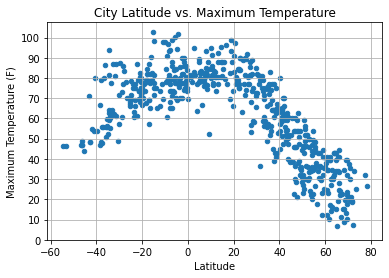

<Figure size 432x288 with 0 Axes>

In [12]:
lat_temp_scat = clean_city_data.plot(x="Latitude", y="Max Temp (F)", kind="scatter")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.title ("City Latitude vs. Maximum Temperature")
plt.yticks(np.arange(0, 110, 10))
plt.grid()
plt.savefig("cities_lat_temp.png")
plt.show()
plt.tight_layout()

#CONCLUSION: The temperature is warmer as one moves closer to the equator (latitude=0) either from the North or South pole.
#CONCLUSION: Random city selection worked well to provide a good coverage of latitudes.

## Latitude vs. Humidity Plot

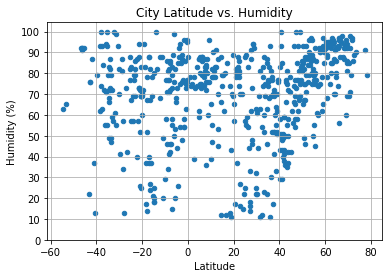

<Figure size 432x288 with 0 Axes>

In [13]:
lat_temp_scat = clean_city_data.plot(x="Latitude", y="Humidity (%)", kind="scatter")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title ("City Latitude vs. Humidity")
plt.yticks(np.arange(0, 110, 10))
plt.grid()
plt.savefig("cities_lat_humid.png")
plt.show()
plt.tight_layout()
#CONCLUSION: No correlation between humidity and latitude.  Majority of the selected cities have humidities that are above 50%.

## Latitude vs. Cloudiness Plot

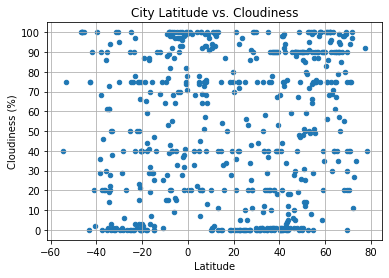

<Figure size 432x288 with 0 Axes>

In [14]:
lat_temp_scat = clean_city_data.plot(x="Latitude", y="Cloudiness (%)", kind="scatter")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title ("City Latitude vs. Cloudiness")
plt.yticks(np.arange(0, 110, 10))
plt.grid()
plt.savefig("cities_lat_cloudy.png")
plt.show()
plt.tight_layout()

#CONCLUSION:No correlation between cloudiness and latitude.  

## Latitude vs. Wind Speed Plot

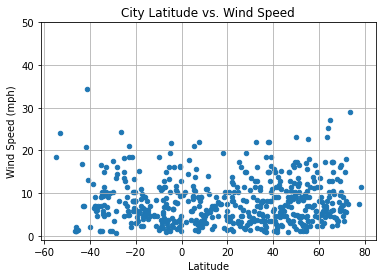

<Figure size 432x288 with 0 Axes>

In [15]:
lat_temp_scat = clean_city_data.plot(x="Latitude", y="Wind Speed (mph)", kind="scatter")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title ("City Latitude vs. Wind Speed")
plt.yticks(np.arange(0, 60, 10))
plt.grid()
plt.savefig("cities_lat_wind.png")
plt.show()
plt.tight_layout()
#CONCLUSION: No correlation between windspeed and latitude.  Majority of the selected cities have humidities that are below 15 mph.

## Linear Regression

In [16]:
#Create Weather dataframe for Northern Hemisphere Cities.

Northern_cities = clean_city_data.loc[(clean_city_data["Latitude"] >= 0), :]
Northern_cities.to_csv("Northerncities_weather_data.csv")
Northern_cities

,City ID,City,Country,Latitude,Longitude,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
4,1254046,Tura,IN,25.52,90.22,74.25,89,0,2.28,1603042087
6,3708911,Guararé,PA,7.82,-80.28,82.40,83,75,6.93,1603042331
7,3831208,Qaanaaq,GL,77.48,-69.36,32.13,91,92,7.43,1603042075
9,2126199,Cherskiy,RU,68.75,161.30,19.45,92,80,7.78,1603042331
10,4845585,Westport,US,41.14,-73.36,64.00,48,20,11.41,1603042331
...,...,...,...,...,...,...,...,...,...,...
555,2525362,Carbonia,IT,39.17,8.52,64.99,77,40,10.29,1603042381
556,1283217,Khanbari,NP,27.37,87.20,68.22,62,25,1.81,1603042381
557,1501795,Krivosheino,RU,57.34,83.93,30.74,92,98,13.71,1603042381
558,5942913,Dryden,CA,49.78,-92.75,28.40,86,90,10.29,1603042382


In [17]:
#Create Weather datafram for Southern Hemisphere Cities.

Southern_cities = clean_city_data.loc[(clean_city_data["Latitude"] <= 0), :]
Southern_cities.to_csv("Southerncities_weather_data.csv")
Southern_cities

,City ID,City,Country,Latitude,Longitude,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
0,3833367,Ushuaia,AR,-54.80,-68.30,46.40,63,40,18.34,1603042331
1,964432,Port Alfred,ZA,-33.59,26.89,63.00,79,50,9.95,1603042072
2,2075265,Busselton,AU,-33.65,115.33,61.00,49,3,9.48,1603042331
3,1067565,Beloha,MG,-25.17,45.05,66.06,77,0,18.28,1603042089
5,3366880,Hermanus,ZA,-34.42,19.23,64.00,68,61,5.08,1603042331
...,...,...,...,...,...,...,...,...,...,...
545,4032420,Neiafu,TO,-18.65,-173.98,73.40,83,75,15.17,1603042380
546,1642858,Jambi City,ID,-1.60,103.62,73.99,96,38,3.42,1603042380
548,3398428,Humberto de Campos,BR,-2.60,-43.46,89.78,48,93,11.54,1603042381
551,3945985,Camaná,PE,-16.62,-72.71,65.34,67,70,6.17,1603042156


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between Latitude and Maximum Temperature is -0.88, indicating strong negative correlation.
The linear regression equation is y = -1.01x + 96.24.
The r-squared is: 0.77


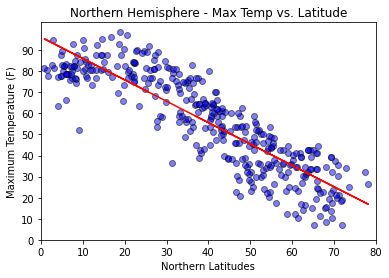

<Figure size 432x288 with 0 Axes>

In [18]:
N_maxtemp= Northern_cities["Max Temp (F)"]
N_latitude = Northern_cities["Latitude"]

correlation1 = st.pearsonr(N_latitude, N_maxtemp)

scatter1 = plt.scatter(N_latitude, N_maxtemp, marker="o", facecolors="blue", edgecolors="black", alpha=0.5)
(slope, intercept, rvalue, pvalue, stderr) = linregress(N_latitude, N_maxtemp)

regress_values = N_latitude * slope + intercept

line_eq1 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The correlation between Latitude and Maximum Temperature is {round(correlation1[0],2)}, indicating strong negative correlation.")
print(f"The linear regression equation is {line_eq1}.")
print(f"The r-squared is: {round(rvalue**2,2)}")

plt.plot(N_latitude,regress_values,"r-")
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.xlabel("Northern Latitudes")
plt.yticks(np.arange(0, 100, 10))
plt.xlim(0, 80)
plt.savefig("Ncities_lat_temp.png")
plt.show()
plt.tight_layout()

#CONCLUSION: The closer a city is located towards the North Pole (lat = +90), the colder the temperature.  
#CONCLUSION: The closer a city is located towards the equator (lat = 0), the warmer the temperature.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between Latitude and Maximum Temperature is 0.63, indicating moderate positive correlation.
The linear regression equation is y = 0.59x + 84.89.
The r-squared is: 0.39


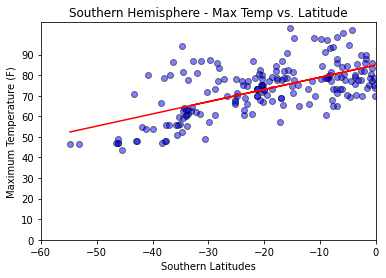

<Figure size 432x288 with 0 Axes>

In [19]:
S_maxtemp= Southern_cities["Max Temp (F)"]
S_latitude = Southern_cities["Latitude"]

correlation2 = st.pearsonr(S_latitude, S_maxtemp)

scatter2 = plt.scatter(S_latitude, S_maxtemp, marker="o", facecolors="blue", edgecolors="black", alpha=0.5)

(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(S_latitude, S_maxtemp)
regress_values2 = S_latitude * slope2 + intercept2

line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))

print(f"The correlation between Latitude and Maximum Temperature is {round(correlation2[0],2)}, indicating moderate positive correlation.")
print(f"The linear regression equation is {line_eq2}.")
print(f"The r-squared is: {round(rvalue2**2,2)}")

plt.plot(S_latitude,regress_values2,"r-")
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.xlabel("Southern Latitudes")
plt.yticks(np.arange(0, 100, 10))
plt.xlim(-60, 0)
plt.savefig("Scities_lat_temp.png")
plt.show()
plt.tight_layout()
#CONCLUSION: The closer a city is located towards the South Pole (lat = -90), the colder the temperature.  
#CONCLUSION: The closer a city is located towards the equator (lat = 0), the warmer the temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between Latitude and Humidity is 0.29, indicating no correlation.
The linear regression equation is y = 0.31x + 58.73.
The r-squared is: 0.09


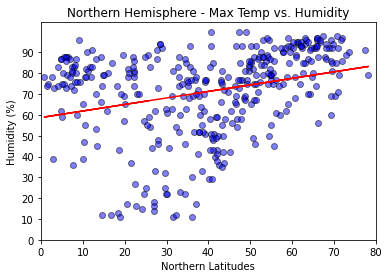

<Figure size 432x288 with 0 Axes>

In [21]:
N_humidity= Northern_cities["Humidity (%)"]

correlation3 = st.pearsonr(N_latitude, N_humidity)

scatter3 = plt.scatter(N_latitude, N_humidity, marker="o", facecolors="blue", edgecolors="black", alpha=0.5)
(slope3, intercept3, rvalue3, pvalue3, stderr3) = linregress(N_latitude, N_humidity)

regress_values3 = N_latitude * slope3 + intercept3

line_eq3 = "y = " + str(round(slope3,2)) + "x + " + str(round(intercept3,2))

print(f"The correlation between Latitude and Humidity is {round(correlation3[0],2)}, indicating no correlation.")
print(f"The linear regression equation is {line_eq3}.")
print(f"The r-squared is: {round(rvalue3**2,2)}")

plt.plot(N_latitude,regress_values3,"r-")
plt.title("Northern Hemisphere - Max Temp vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Northern Latitudes")
plt.yticks(np.arange(0, 100, 10))
plt.xlim(0, 80)
plt.savefig("Ncities_lat_humid.png")
plt.show()
plt.tight_layout()

#CONCLUSION: No correlation between the humidity and latitudes in Northern hemisphere.  
#CONCLUSION: From our selection of cities, the humidity is higher (above 65%) for a city that is located close the equator (lat=0 - 10). tends to be of 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between Latitude and Humidity is -0.07, indicating no correlation.
The linear regression equation is y = -0.12x + 64.85.
The r-squared is: 0.01


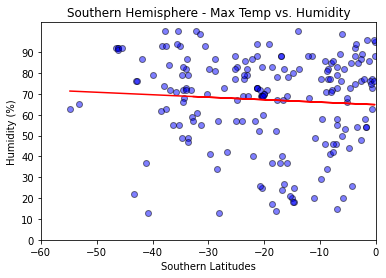

<Figure size 432x288 with 0 Axes>

In [22]:
S_humidity = Southern_cities["Humidity (%)"]

correlation4 = st.pearsonr(S_latitude, S_humidity )

scatter4 = plt.scatter(S_latitude, S_humidity, marker="o", facecolors="blue", edgecolors="black", alpha=0.5)

(slope4, intercept4, rvalue4, pvalue4, stderr4) = linregress(S_latitude, S_humidity)
regress_values4 = S_latitude * slope4 + intercept4

line_eq4 = "y = " + str(round(slope4,2)) + "x + " + str(round(intercept4,2))

print(f"The correlation between Latitude and Humidity is {round(correlation4[0],2)}, indicating no correlation.")
print(f"The linear regression equation is {line_eq4}.")
print(f"The r-squared is: {round(rvalue4**2,2)}")

plt.plot(S_latitude,regress_values4,"r-")
plt.title("Southern Hemisphere - Max Temp vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Southern Latitudes")
plt.yticks(np.arange(0, 100, 10))
plt.xlim(-60, 0)
plt.savefig("Scities_lat_humid.png")
plt.show()
plt.tight_layout()

#CONCLUSION: No correlation between the humidity and latitudes in Southern hemisphere. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Latitude and Humidity is 0.17, indicating no correlation.
The linear regression equation is y = 0.32x + 40.18.
The r-squared is: 0.03


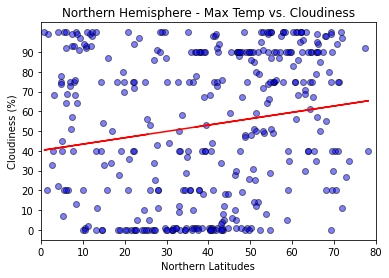

<Figure size 432x288 with 0 Axes>

In [23]:
N_cloudy= Northern_cities["Cloudiness (%)"]

correlation5 = st.pearsonr(N_latitude, N_cloudy)

scatter5 = plt.scatter(N_latitude, N_cloudy, marker="o", facecolors="blue", edgecolors="black", alpha=0.5)
(slope5, intercept5, rvalue5, pvalue5, stderr5) = linregress(N_latitude, N_cloudy)

regress_values5 = N_latitude * slope5 + intercept5

line_eq5 = "y = " + str(round(slope5,2)) + "x + " + str(round(intercept5,2))

print(f"The correlation between Latitude and Humidity is {round(correlation5[0],2)}, indicating no correlation.")
print(f"The linear regression equation is {line_eq5}.")
print(f"The r-squared is: {round(rvalue5**2,2)}")

plt.plot(N_latitude,regress_values5,"r-")
plt.title("Northern Hemisphere - Max Temp vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Northern Latitudes")
plt.yticks(np.arange(0, 100, 10))
plt.xlim(0, 80)
plt.savefig("Ncities_lat_cloud.png")
plt.show()
plt.tight_layout()

#CONCLUSION: No correlation between the cloudiness and latitudes in Northern hemisphere. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Latitude and Cloudiness is 0.19, indicating no correlation.
The linear regression equation is y = 0.51x + 59.92.
The r-squared is: 0.03


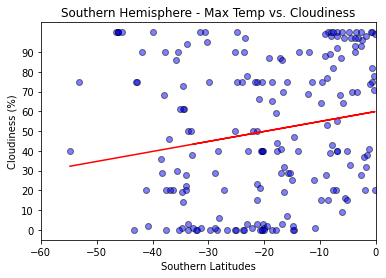

<Figure size 432x288 with 0 Axes>

In [24]:
S_cloudy = Southern_cities["Cloudiness (%)"]

correlation6 = st.pearsonr(S_latitude, S_cloudy)

scatter6 = plt.scatter(S_latitude, S_cloudy, marker="o", facecolors="blue", edgecolors="black", alpha=0.5)

(slope6, intercept6, rvalue6, pvalue6, stderr6) = linregress(S_latitude, S_cloudy)
regress_values6 = S_latitude * slope6 + intercept6

line_eq6 = "y = " + str(round(slope6,2)) + "x + " + str(round(intercept6,2))

print(f"The correlation between Latitude and Cloudiness is {round(correlation6[0],2)}, indicating no correlation.")
print(f"The linear regression equation is {line_eq6}.")
print(f"The r-squared is: {round(rvalue6**2,2)}")

plt.plot(S_latitude,regress_values6,"r-")
plt.title("Southern Hemisphere - Max Temp vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Southern Latitudes")
plt.yticks(np.arange(0, 100, 10))
plt.xlim(-60, 0)
plt.savefig("Scities_lat_cloud.png")
plt.show()
plt.tight_layout()
#CONCLUSION: No correlation between the cloudiness and latitudes in Southern hemisphere. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between Latitude and Wind Speed is 0.14, indicating very no correlation.
The linear regression equation is y = 0.04x + 6.64.
The r-squared is: 0.02


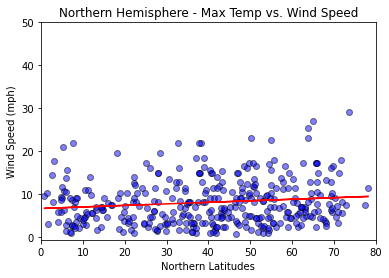

<Figure size 432x288 with 0 Axes>

In [26]:
N_wind= Northern_cities["Wind Speed (mph)"]

correlation7 = st.pearsonr(N_latitude, N_wind)

scatter7 = plt.scatter(N_latitude, N_wind, marker="o", facecolors="blue", edgecolors="black", alpha=0.5)
(slope7, intercept7, rvalue7, pvalue7, stderr7) = linregress(N_latitude, N_wind)

regress_values7 = N_latitude * slope7 + intercept7

line_eq7 = "y = " + str(round(slope7,2)) + "x + " + str(round(intercept7,2))

print(f"The correlation between Latitude and Wind Speed is {round(correlation7[0],2)}, indicating very no correlation.")
print(f"The linear regression equation is {line_eq7}.")
print(f"The r-squared is: {round(rvalue7**2,2)}")

plt.plot(N_latitude,regress_values7,"r-")
plt.title("Northern Hemisphere - Max Temp vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Northern Latitudes")
plt.yticks(np.arange(0, 60, 10))
plt.xlim(0, 80)
plt.savefig("Ncities_lat_wind.png")
plt.show()
plt.tight_layout()

#CONCLUSION: No correlation between the wind speeds and latitudes in Northern hemisphere. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between Latitude and Wind Speed is -0.17, indicating no correlation.
The linear regression equation is y = -0.07x + 6.54.
The r-squared is: 0.03


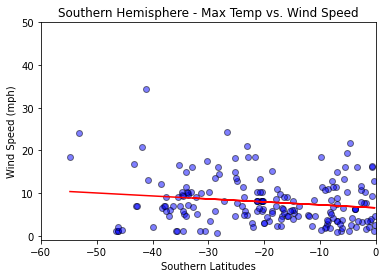

<Figure size 432x288 with 0 Axes>

In [27]:
S_wind = Southern_cities["Wind Speed (mph)"]

correlation8 = st.pearsonr(S_latitude, S_wind)

scatter8 = plt.scatter(S_latitude, S_wind, marker="o", facecolors="blue", edgecolors="black", alpha=0.5)

(slope8, intercept8, rvalue8, pvalue8, stderr8) = linregress(S_latitude, S_wind)
regress_values8 = S_latitude * slope8 + intercept8

line_eq8 = "y = " + str(round(slope8,2)) + "x + " + str(round(intercept8,2))

print(f"The correlation between Latitude and Wind Speed is {round(correlation8[0],2)}, indicating no correlation.")
print(f"The linear regression equation is {line_eq8}.")
print(f"The r-squared is: {round(rvalue8**2,2)}")

plt.plot(S_latitude,regress_values8,"r-")
plt.title("Southern Hemisphere - Max Temp vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Southern Latitudes")
plt.yticks(np.arange(0, 60, 10))
plt.xlim(-60, 0)
plt.savefig("Scities_lat_wind.png")
plt.show()
plt.tight_layout()
#CONCLUSION: No correlation between the wind speed and latitudes in Southern hemisphere. 